In [70]:
from rfgap import RFGAP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

from pi_test_functions import linear_sum, exponential_difference, exponential_interaction

In [71]:
# dataset = fetch_openml(data_id=23515, parser = 'auto')
# x = dataset.data
# y = dataset.target

In [72]:
x = np.random.multivariate_normal(np.zeros((10, )), np.eye(10), 100)
y = exponential_difference(x)

x_test = np.random.multivariate_normal(np.zeros((10, )), np.eye(10), 100)
y_test = exponential_difference(x_test)

In [73]:
alpha = 0.05

In [74]:
rf = RFGAP(prediction_type = 'regression', oob_score = mean_squared_error)
rf.fit(x, y, x_test = x_test)
rf.oob_prediction_se()
rf.oob_quantile_se(alpha = alpha)
oob_pi = rf.weighted_oob_se
# rf.prox_weighted_quantile_pi(y, alpha = alpha)

In [75]:
rf.proximities.shape

(100, 100)

In [76]:
print('Expected Coverage: ', 1 - alpha)
print('Weighted Coverage: ', rf.oob_pi_coverage)
print('Quantile Coverage: ', rf.q_pi_coverage)
# print('Prox Weighted Quantile Coverage: ', rf.weighted_quantile_coverage)

Expected Coverage:  0.95
Weighted Coverage:  0.9
Quantile Coverage:  0.93


In [77]:
rf.oob_score_

1966.9273187009758

In [78]:
# plt.figure(figsize=(8, 8))
# plt.scatter(x, rf.oob_prediction_, label='OOB Predictions', s = 0.5)
# plt.plot(x, y, label='True function', color='orange')
# plt.errorbar(x, rf.oob_prediction_, oob_pi, c = 'gray', alpha = 0.5)

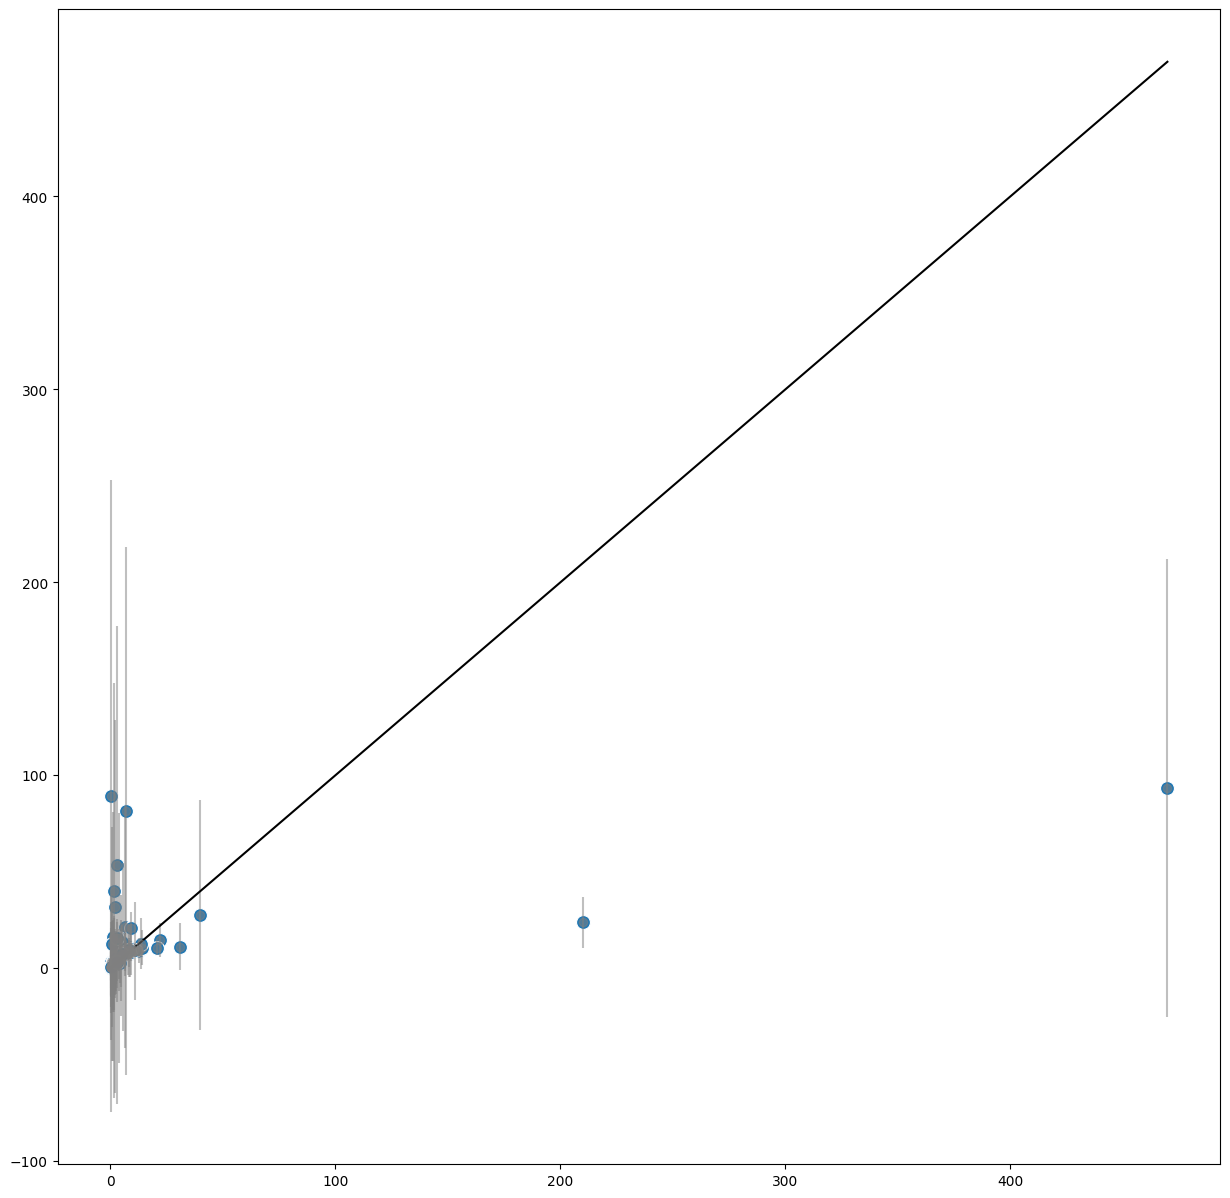

In [79]:
# Need a metric that relates coverage to how far off the predictions are at OOB level
# Need to check out PIs for new points

plt.figure(figsize=(15, 15))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 100)
plt.errorbar(y, rf.oob_prediction_, yerr = rf.weighted_oob_se, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')
# plt.scatter(y, rf.lb, c = 'red')
# plt.scatter(y, rf.ub, c = 'blue')

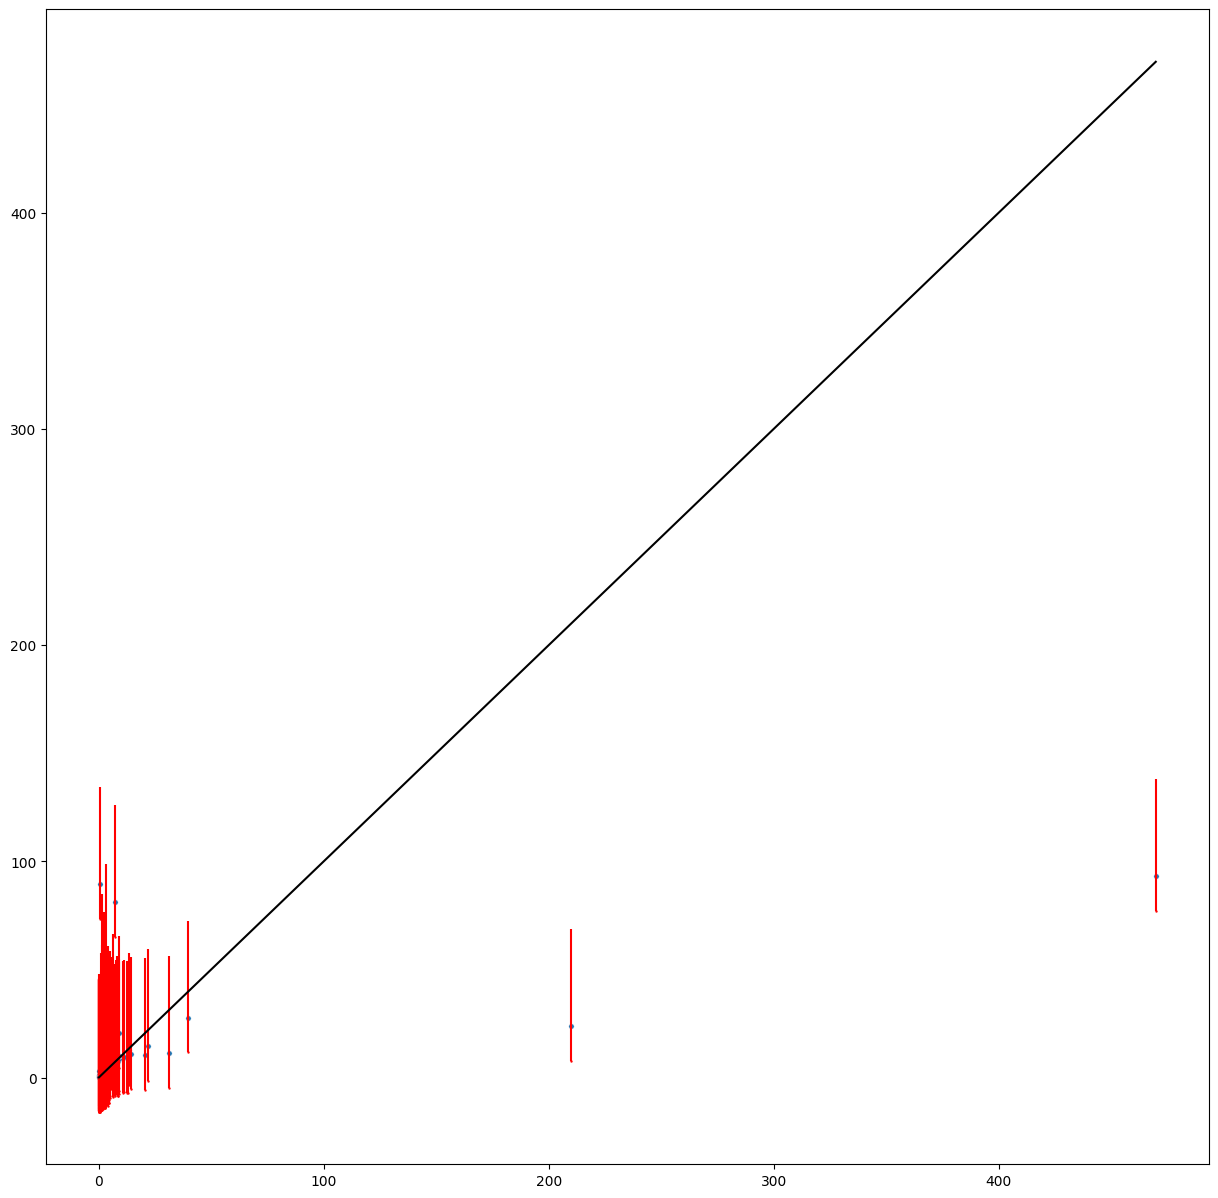

In [80]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 15)
plt.vlines(y, ymin = rf.oob_prediction_, ymax = rf.ub_q, colors = 'red', alpha = 1)
plt.vlines(y, ymin = rf.lb_q, ymax = rf.oob_prediction_, colors = 'red', alpha = 1)
plt.scatter(y, rf.lb_q, c = 'red', s = 0.5)
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')

0.96


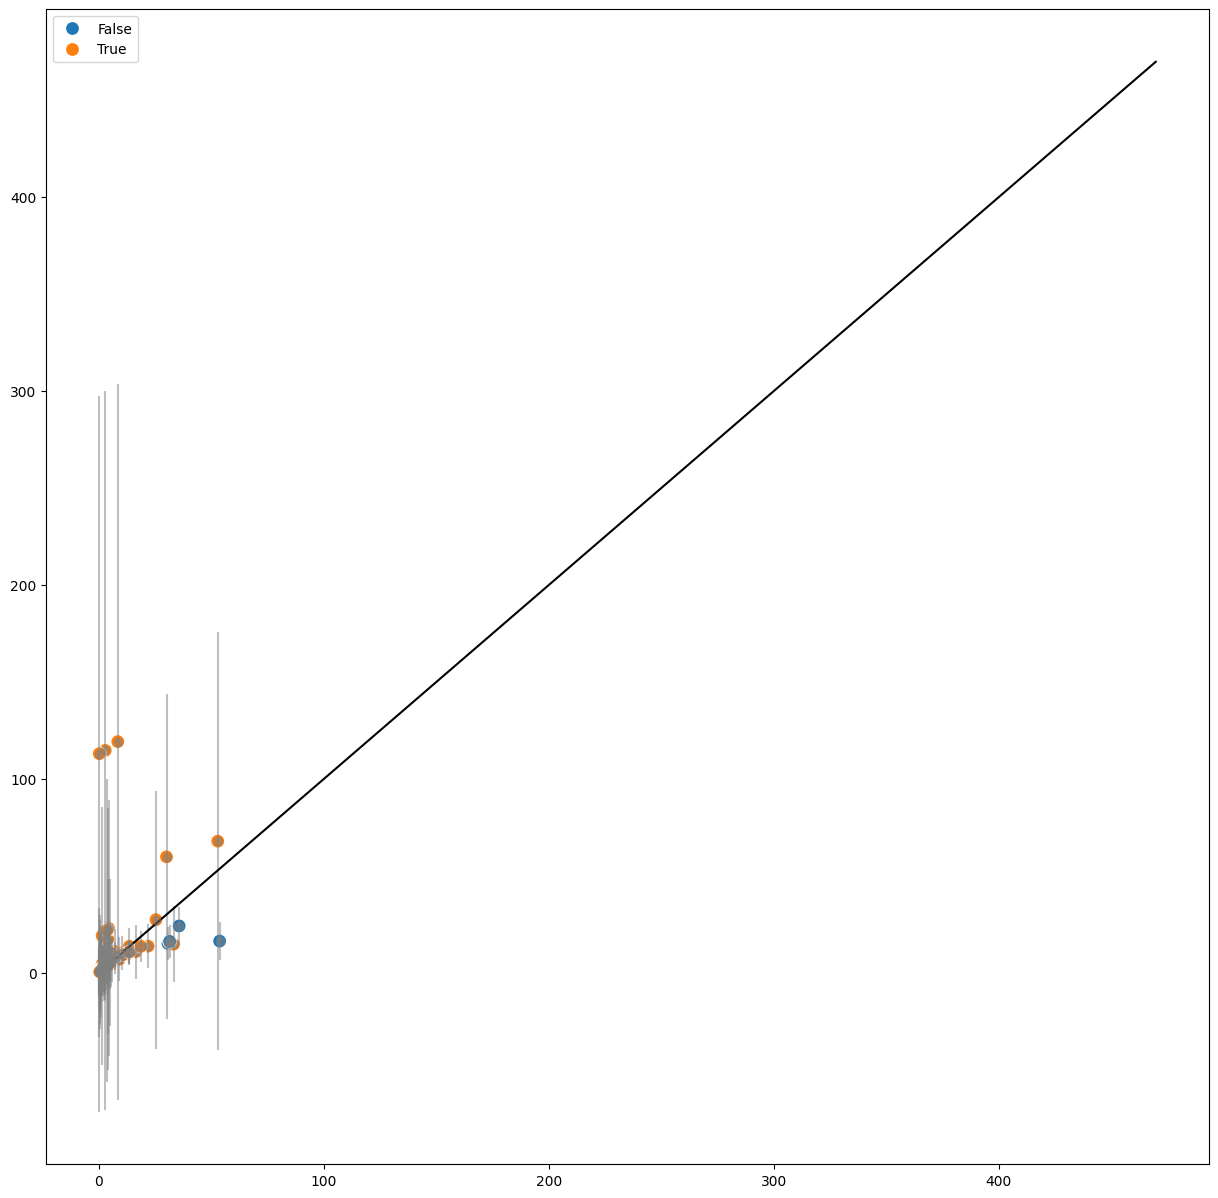

In [81]:
# Need a metric that relates coverage to how far off the predictions are at OOB level
# Need to check out PIs for new points
rf.get_prediction_intervals(y_test)
print(rf.test_coverage)
test_covered = (y_test >= rf.test_lb) & (y_test <= rf.test_ub)

plt.figure(figsize=(15, 15))
sns.scatterplot(x = y_test, y = rf.test_preds, s = 100, hue = test_covered)
plt.errorbar(y_test, rf.test_preds, yerr = rf.weighted_test_errors, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')
# plt.scatter(y, rf.lb, c = 'red')
# plt.scatter(y, rf.ub, c = 'blue')

In [82]:
test_lengths = (rf.test_ub - rf.test_lb)

In [83]:
test_covered * 1

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [84]:
np.std(test_lengths[test_covered])

69.58002162018313

In [85]:
np.std(test_lengths[~test_covered])

1.3216392254298188

In [86]:
np.max(test_lengths)

370.35496595079877

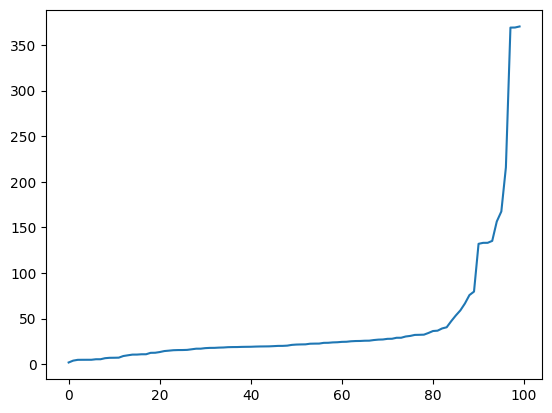

In [87]:
plt.plot(np.sort(test_lengths))

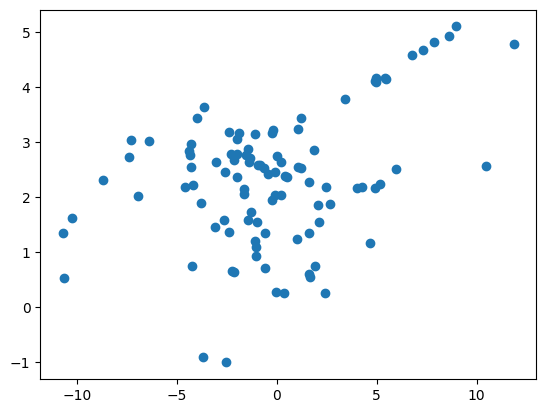

In [88]:
plt.scatter(np.log((rf.oob_prediction_ - y)**2), np.log(oob_pi))

In [89]:
np.corrcoef(np.log((rf.oob_prediction_ - y)**2), np.log(oob_pi))

array([[1.        , 0.40788412],
       [0.40788412, 1.        ]])

In [90]:
np.corrcoef((rf.oob_prediction_ - y)**2, oob_pi)

array([[1.        , 0.36469849],
       [0.36469849, 1.        ]])

In [91]:
rf.proximity_covar()

In [92]:
prox_covar = rf.prox_covar
prox_covar2 = rf.prox_covar_2

In [93]:
(y - np.mean(y)) @ np.linalg.inv(prox_covar) @ (y - np.mean(y))

100.00000000000034

In [112]:
np.sum(prox_covar)

44062.540734574446

In [110]:
((y - np.mean(y)) @ np.linalg.inv(prox_covar2))

array([ 1.91855233e-01,  5.16614553e-01, -1.66149847e+00, -6.42261159e+00,
        2.62775987e-01,  1.10417103e+00, -3.45236083e-01,  5.36900460e-01,
        2.42707800e+00,  7.62724178e-01, -3.93659596e-01, -6.00650499e+00,
       -6.58368679e-01,  6.27464045e-01, -1.54185696e+01,  1.34043538e-01,
       -2.94183580e+00,  8.17973296e-01,  1.94439930e+01, -6.64644105e+00,
        2.39582110e+00, -7.04934021e+00,  2.20756744e+00,  1.13246805e+00,
        6.36414852e-01,  6.00066689e-01,  1.76676493e-01, -5.77812211e-01,
       -2.93072609e+00,  2.21751614e+00,  1.23385870e+00, -5.69560475e-01,
        2.92602665e-01, -1.21762422e+00, -3.24534760e-02, -2.89525028e+00,
       -2.70424484e-01,  1.75833408e+00,  1.53388301e-01, -2.30528553e+00,
       -1.84215666e+00, -1.21065294e+00, -1.02112866e+01,  3.88394237e-01,
        3.06435973e-01, -3.30527450e-01,  1.46211627e+00, -1.09154496e+00,
       -6.24585810e-01,  5.36511757e-01,  2.36747867e+00,  1.15905376e+01,
        3.58857513e-02,  

In [94]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed')

emb = mds.fit_transform((prox_covar + prox_covar.T)/2)

/home/rhodes8/anaconda3/envs/rfgap/lib/python3.12/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: >

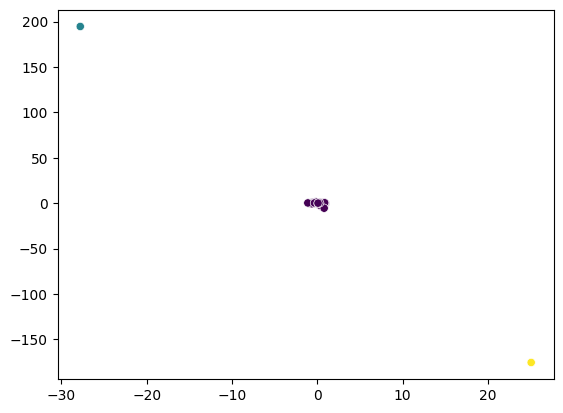

In [95]:
import seaborn as sns
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], c = y)

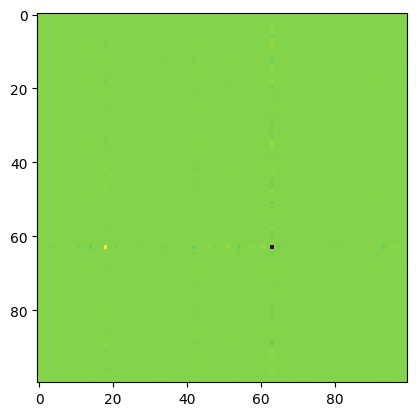

In [96]:
plt.imshow(np.linalg.inv(prox_covar))

In [97]:
np.max(np.linalg.inv(prox_covar))

87.62765905658435

In [98]:
np.linalg.inv(x.T  @ x) @ x.T  @ y

array([-22.29512433, -14.03754711,   2.77401169,   1.79993795,
         7.08589224,   9.74669245,   3.88752726,  -5.6521305 ,
         2.4969694 ,  -8.14144184])

In [99]:
beta = np.linalg.inv(x.T @ prox_covar @ x) @ x.T @ prox_covar @ y

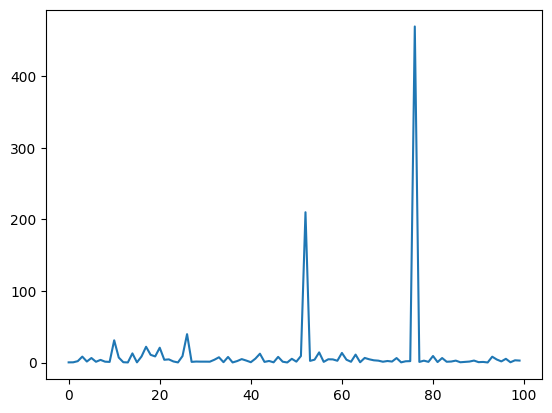

In [119]:
plt.plot(y)

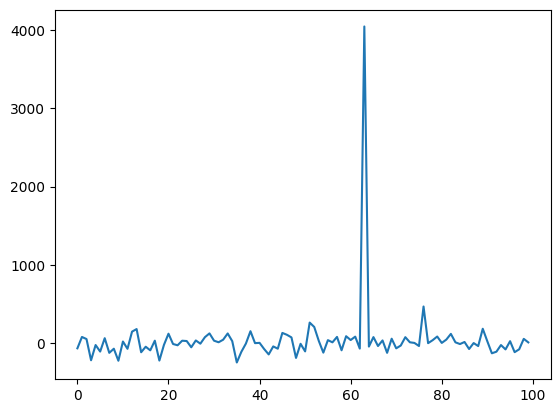

In [118]:
plt.plot(y - np.linalg.inv(prox_covar) @ y)

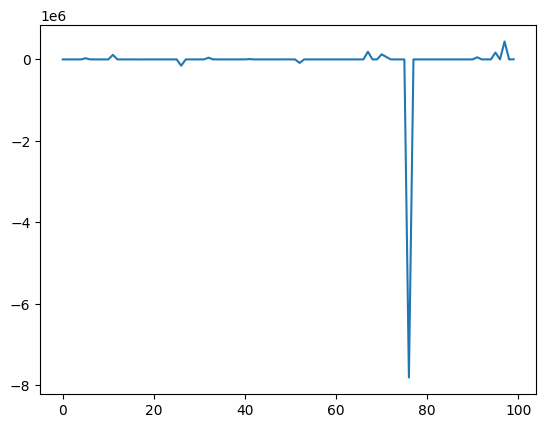

In [120]:
plt.plot(y - prox_covar @ y)

In [113]:
beta

array([ -28.19795926,   13.04008697,   41.82728072,   41.32637694,
        -88.02161348,  238.27823763,  259.80977881,  125.58025609,
       -114.39449103,  -21.48024193])

In [101]:
#TODO: Come up with simulated data to check coverage of a repeated missing point.
# TODO: Write up a metric

In [102]:
# what to do about cases that are not near any other points?